Missing values:
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.55      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503

ROC AUC Score: 0.7481643747913558


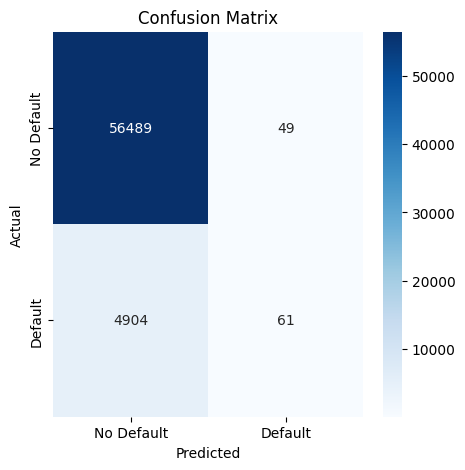

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       1.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.96      0.50      0.48     61503
weighted avg       0.93      0.92      0.88     61503

Random Forest ROC AUC Score: 0.7104596639314353


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Load dataset utama
app_train = pd.read_csv("/content/drive/MyDrive/Rakamin/application_train.csv")

# 1. Exploratory Data Analysis (EDA)
print("Missing values:")
print(app_train.isnull().sum().sort_values(ascending=False).head(10))

# 2. Feature Selection & Engineering
# Menghapus kolom dengan terlalu banyak missing values (>40%)
thresh = 0.4 * len(app_train)
app_train = app_train.dropna(thresh=thresh, axis=1)

# Memisahkan fitur numerik dan kategorikal
num_features = app_train.select_dtypes(include=["number"]).columns.tolist()
cat_features = app_train.select_dtypes(include=["object"]).columns.tolist()
num_features.remove("TARGET")  # Target tidak termasuk fitur

# 3. Preprocessing Pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# 4. Data Splitting
X = app_train.drop(columns=["TARGET"])
y = app_train["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Model Training - Logistic Regression
log_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

# 6. Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Model Training - Random Forest (Alternative Model)
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


Missing values:
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.55      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503

ROC AUC Score: 0.7481643747913558


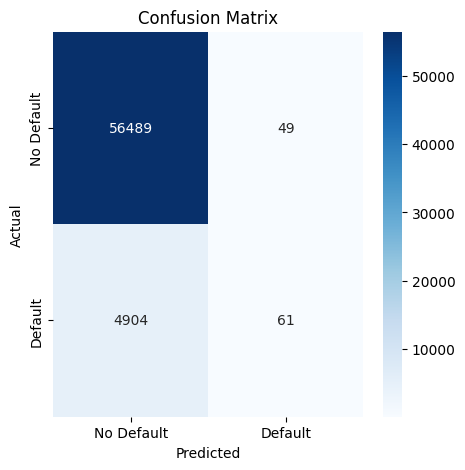

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       1.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.96      0.50      0.48     61503
weighted avg       0.93      0.92      0.88     61503

Random Forest ROC AUC Score: 0.7104596639314353


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:40:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     56538
           1       0.19      0.58      0.28      4965

    accuracy                           0.76     61503
   macro avg       0.57      0.68      0.57     61503
weighted avg       0.89      0.76      0.81     61503

XGBoost ROC AUC Score: 0.7490942113204828


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.230625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8984
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 214
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     56538
           1       0.18      0.64      0.28      4965

    accuracy                           0.74     61503
   macro avg       0.57      0.69      0.56     61503
weighted avg       0.90      0.74      0.79     61503

LightGBM ROC AUC Score: 0.7601868069589108


In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Load dataset utama
app_train = pd.read_csv("/content/drive/MyDrive/Rakamin/application_train.csv")

# 1. Exploratory Data Analysis (EDA)
print("Missing values:")
print(app_train.isnull().sum().sort_values(ascending=False).head(10))

# 2. Feature Selection & Engineering
# Menghapus kolom dengan terlalu banyak missing values (>40%)
thresh = 0.4 * len(app_train)
app_train = app_train.dropna(thresh=thresh, axis=1)

# Memisahkan fitur numerik dan kategorikal
num_features = app_train.select_dtypes(include=["number"]).columns.tolist()
cat_features = app_train.select_dtypes(include=["object"]).columns.tolist()
num_features.remove("TARGET")  # Target tidak termasuk fitur

# 3. Preprocessing Pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# 4. Data Splitting
X = app_train.drop(columns=["TARGET"])
y = app_train["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Model Training - Logistic Regression
log_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

# 6. Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Model Training - Random Forest (Alternative Model)
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

from xgboost import XGBClassifier

# Model XGBoost
xgb_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10))
])

# Training model
xgb_model.fit(X_train, y_train)

# Evaluasi model
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

from lightgbm import LGBMClassifier

# Model LightGBM
lgb_model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LGBMClassifier(scale_pos_weight=10))
])

# Training model
lgb_model.fit(X_train, y_train)

# Evaluasi model
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM ROC AUC Score:", roc_auc_score(y_test, y_proba_lgb))

